In [1]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller,acf
from statsmodels.tsa.arima.model import ARIMA
from  pandas.tseries.offsets import DateOffset
from sklearn.metrics import mean_squared_error,r2_score
from  pandas.tseries.offsets import DateOffset
import seaborn as sms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
bokhol=pd.read_excel('basedonnees.xlsx',index_col=[0],parse_dates=True)

In [3]:
bokhol.head()

#sms.pairplot(bokhol)

,W2- Irradiance (W/m²),W3 - Irradiance (W/m²),W4 - Irradiance (W/m²),Temperature ambiante (°C),Vitesse du vent (m/s),Température module (°C),Production Centrale Meter 1 - (W)
Date (+00:00),,,,,,,
2021-01-01 00:05:00,0.0,0,0.0,21.9667,1.7416,25.9,0
2021-01-01 00:10:00,0.0,0,0.0,21.9667,1.7416,25.9,0
2021-01-01 00:15:00,0.0,0,0.0,21.9667,1.7416,25.9,0
2021-01-01 00:20:00,0.0,0,0.0,21.9667,1.7416,25.9,0
2021-01-01 00:25:00,0.0,0,0.0,21.9667,1.7416,25.9,0


In [4]:
TMP=pd.DataFrame(bokhol['Température module (°C)'])
TMP#=np.log(TMP)

,Température module (°C)
Date (+00:00),
2021-01-01 00:05:00,25.9
2021-01-01 00:10:00,25.9
2021-01-01 00:15:00,25.9
2021-01-01 00:20:00,25.9
2021-01-01 00:25:00,25.9
...,...
2021-12-31 23:35:00,NaN
2021-12-31 23:40:00,NaN
2021-12-31 23:45:00,NaN


In [5]:
TC=TMP.dropna(axis=0)
TC

,Température module (°C)
Date (+00:00),
2021-01-01 00:05:00,25.9
2021-01-01 00:10:00,25.9
2021-01-01 00:15:00,25.9
2021-01-01 00:20:00,25.9
2021-01-01 00:25:00,25.9
...,...
2021-12-31 20:40:00,26.8
2021-12-31 20:45:00,26.6
2021-12-31 20:50:00,26.3


<AxesSubplot:xlabel='Date (+00:00)'>

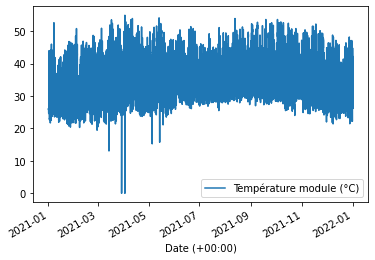

In [6]:
TC.plot()

In [7]:
def adfuller_test(sales):
    result=adfuller(sales)
    label=['ADF test statistic','p_value','lages used','numbre of observation used']
    for value,label in zip(result,label):
        print(label+':'+str(value))
        if result[1]<=0.05:
            print('strong evident agains the null hypothesis ...')
        else:
            print('weak evidence agains null hypothesis...')
            
#adfuller_test(TC)

C:\Users\ABDOULAHI FAYE\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


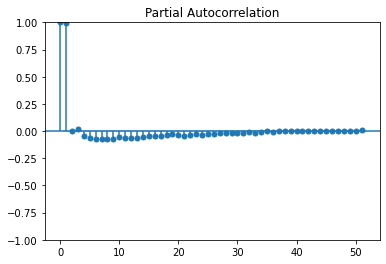

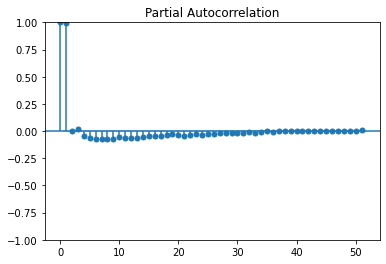

In [8]:
plot_pacf(TC)

### TESTONS LE BON MODEL ARIMA(p,d,q)

In [9]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [10]:
orderModel=auto_arima(TC,trace=True,supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=190518.429, Time=164.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=190665.092, Time=11.76 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=190661.787, Time=6.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=190661.594, Time=13.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=190663.092, Time=4.86 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=187482.884, Time=138.60 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=190635.847, Time=17.25 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=190661.546, Time=48.00 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=186213.477, Time=113.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=190432.740, Time=22.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=185853.580, Time=206.73 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=186226.546, Time=233.21 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=186132.586, Time=215.01 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=186234.686, Ti

### LE  MODEL ARIMA(p,d,q) adequat

In [11]:
model=ARIMA(TC.values,order=(2,1,4))
model_fit=model.fit()

### validation du model


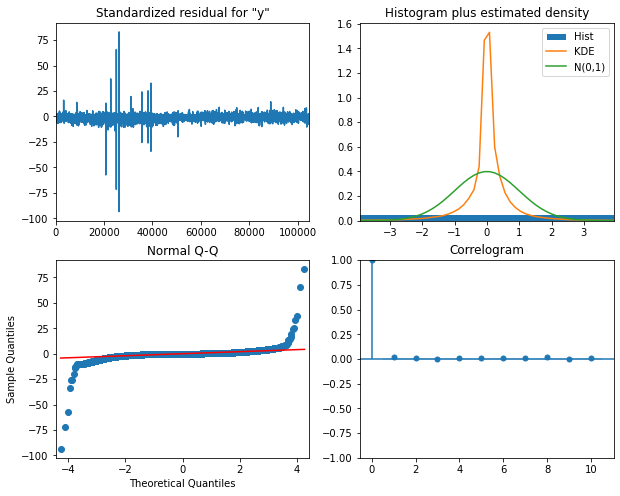

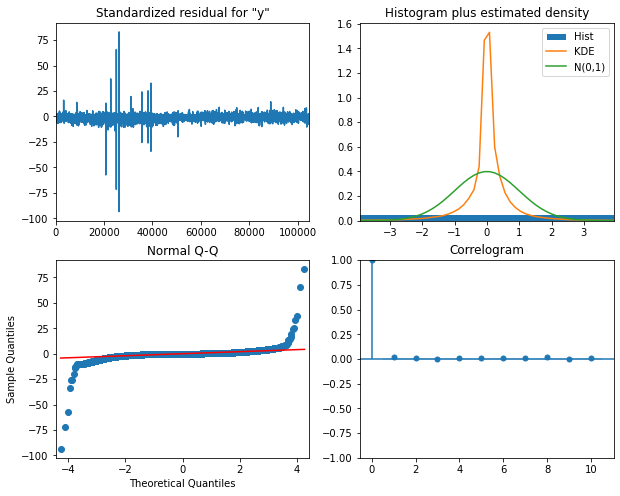

In [12]:
model_fit.plot_diagnostics(figsize=(10, 8))

In [17]:
TC['ARIMA1']=model_fit.predict() #0,2*TC.shape[0]-1)

<AxesSubplot:xlabel='Date (+00:00)'>

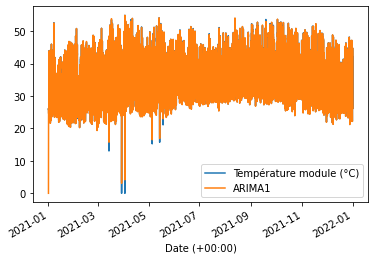

In [18]:
TC.plot()

In [19]:
TC

,Température module (°C),ARIMA1
Date (+00:00),,
2021-01-01 00:05:00,25.9,0.000000
2021-01-01 00:10:00,25.9,25.900000
2021-01-01 00:15:00,25.9,25.900000
2021-01-01 00:20:00,25.9,25.900000
2021-01-01 00:25:00,25.9,25.900000
...,...,...
2021-12-31 20:40:00,26.8,26.835583
2021-12-31 20:45:00,26.6,26.776370
2021-12-31 20:50:00,26.3,26.579016


In [16]:
mois=['2021-01-01 00:10:00','2021-02-28 00:05:00','2021-03-31 00:05:00', '2021-04-30 00:05:00',
               '2021-05-31 00:05:00', '2021-06-30 00:05:00',
               '2021-07-31 00:05:00', '2021-08-31 00:05:00',
               '2021-09-30 00:05:00', '2021-10-31 00:05:00',
               '2021-11-30 00:05:00', '2021-12-31 21:00:00']#pd.date_range(TC.index[0],periods=12,freq='M'

### METHODES DE  PREDICTION

In [22]:
#  division la base en donnees de test et de train
# selection e la colonne Temperature du module
TC_dp=TC['Température module (°C)']
#disparsing de la base de donnees
TC_train=TC_dp.iloc[:-12]
TC_test=TC_dp.iloc[-12:]

In [23]:
TC_train.shape

(104860,)

In [24]:
TC_test.shape[0]

12

In [25]:
TC_dp.shape

(104872,)

In [26]:
model=ARIMA(TC_train,order=(2,1,4))
model_fif=model.fit()

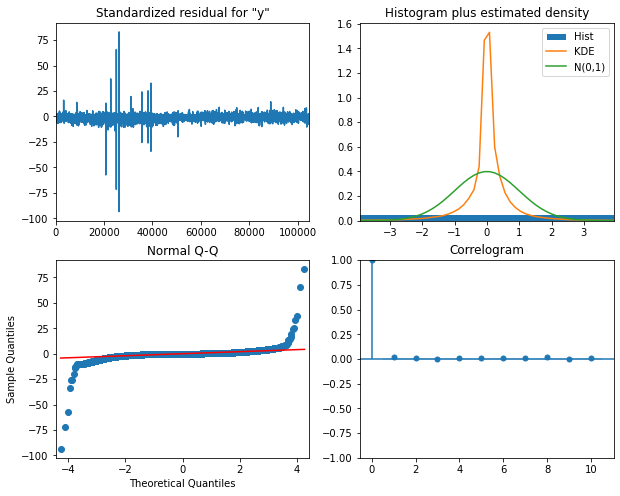

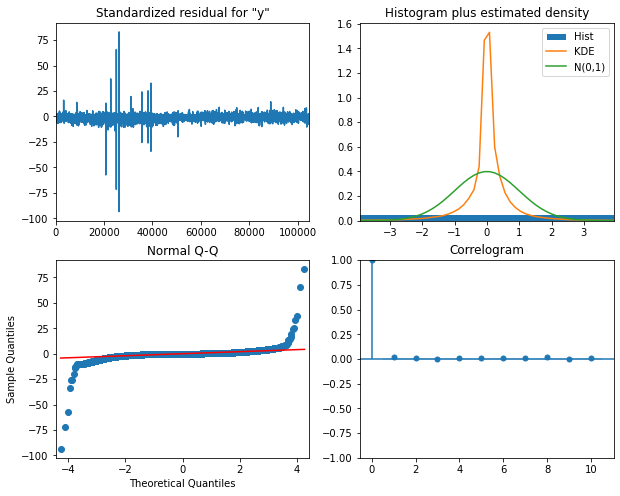

In [27]:
model_fit.plot_diagnostics(figsize=(10, 8))

In [28]:
longueur=TC_test.shape[0] #TC_test.shape[0]+TC_dp.shape[0]
prediction=model_fif.forecast(steps=longueur)

In [29]:
donnees_futures=pd.date_range(TC.index[-1],periods=TC_test.shape[0],freq='00h05t')
prediction.index=donnees_futures

In [30]:
# predictions=np.exp(prediction.predicted_mean)

In [32]:
#plt.plot(pd.date_range(x.index[-1], periods=12, freq='M'), x_pred, color='r', label='Predit')

Text(0.5, 1.0, 'EVOLUTION DE LA TEMPERATURE PREDITE DES MODULES PENDANT 1h')

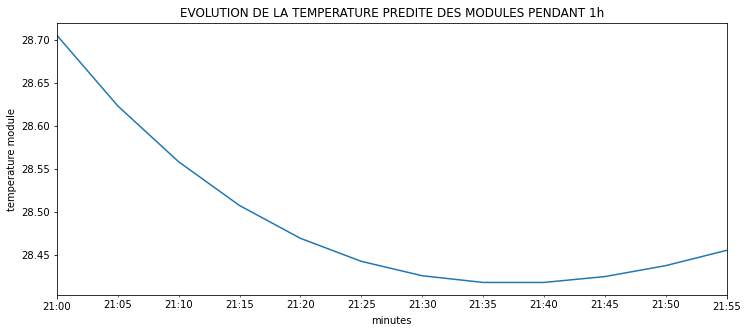

In [33]:
prediction.plot(figsize=(12,5))
plt.xlabel('minutes')
plt.ylabel('temperature module')
plt.title('EVOLUTION DE LA TEMPERATURE PREDITE DES MODULES PENDANT 1h')

### evaluation statistaques du modele de prediction

In [46]:
mean_pred=prediction.mean()
somme=abs(sum(TC_test-mean_pred))
T=1/len(prediction)
mean_TC_test=TC_test.mean()
absolu=np.abs((TC_test.values-prediction.values)/TC_test.values)

#numR=sum((TC_test.values-mean_pred)*(prediction.values-mean_pred))
#demR=sum(((TC_test.values-mean_TC_test)**2)*((prediction.values-mean_pred)**2))

In [49]:
len(TC_test)

12

In [50]:
RMSE=mean_squared_error(prediction,TC_test) # evaluation a court terme
#MBE #information sur les performance du predicteur a long terme
#mape = (np.abs(1-x_pred/x_test)).mean()*100
MAPE=(1/len(TC_test))*sum(absolu) #il mesure l'ajustement du systeme 10 % EST ACCEPTABLE

In [51]:
print('performance a court terme:',RMSE)
print('performance PAR rapport a 10%:',MAPE)
#print('COEFFICIENT DE CORRELATION:',R2)

performance a court terme: 2.3469829044449697
performance PAR rapport a 10%: 0.05094342642476121
